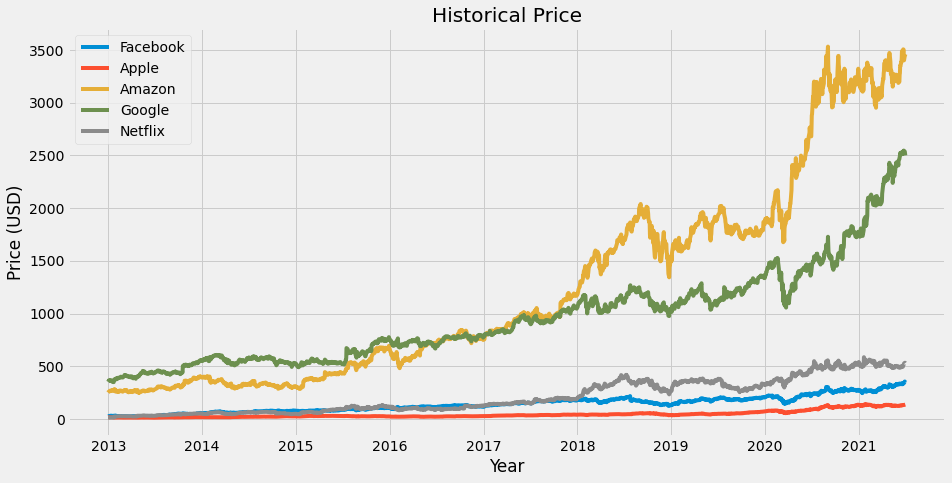

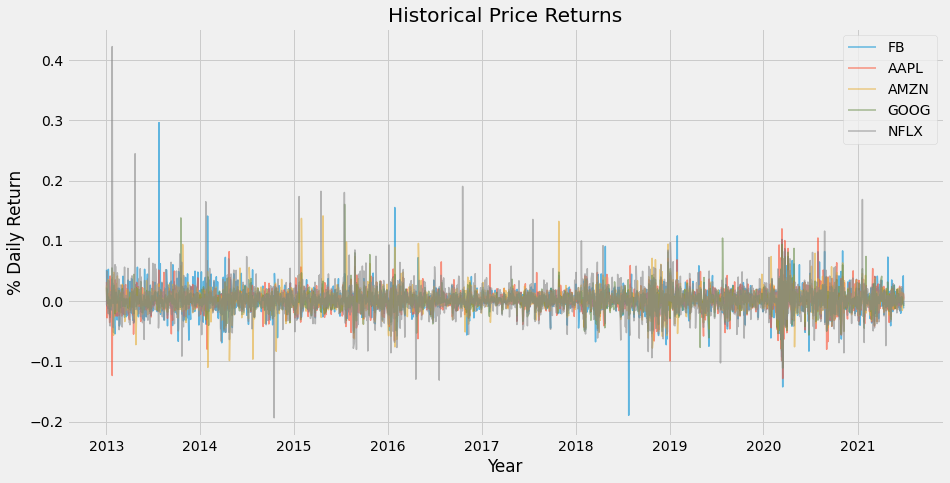

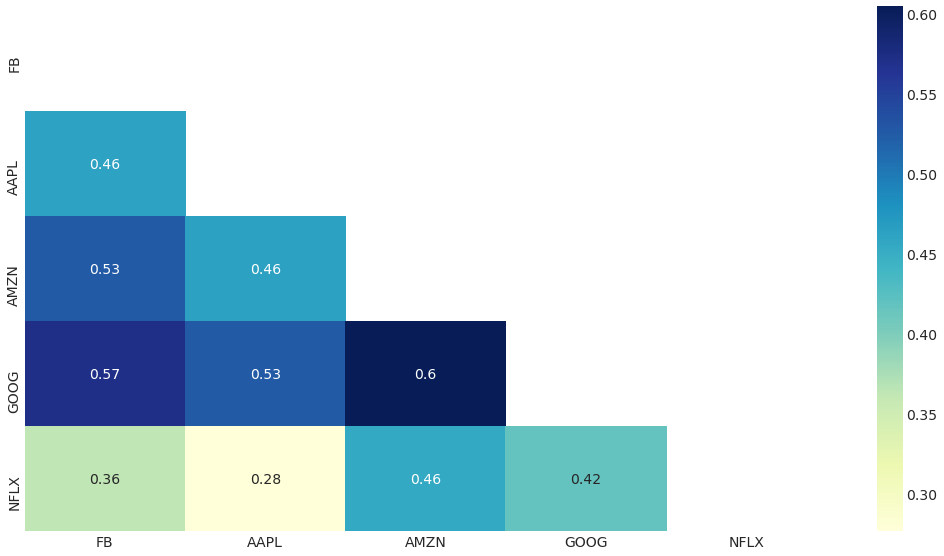

In [1]:
# This programs tries to optimize users portfolio using efficient frontier
#Check how can you get better random nos

import numpy as np
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
import random

random.seed(444)
plt.style.use('fivethirtyeight')

assets = ['FB','AAPL','AMZN','GOOG','NFLX']
stock_startdate = '2013-01-01'
stock_enddate = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=stock_startdate, end=stock_enddate)['Adj Close']

#Plotting the data series
plt.figure(figsize=(14, 7))
ax = plt.subplot()
ax.plot(df.index, df.FB, label='Facebook')
ax.plot(df.index, df.AAPL, label='Apple')
ax.plot(df.index, df.AMZN, label='Amazon')
ax.plot(df.index, df.GOOG, label='Google')
ax.plot(df.index, df.NFLX, label='Netflix')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.title('Historical Price')
ax.legend()
plt.show()

#Calculate the percentage change

df_per = df.pct_change()


plt.figure(figsize=(14, 7))
ax = plt.subplot()
plt.title('Historical Price Returns')
for i in assets:
    ax.plot(df_per.index, df_per[i],lw=1.5, alpha=0.6, label=i)
plt.xlabel('Year')
plt.ylabel('% Daily Return')
ax.legend() 

mask = np.zeros_like(df_per[['FB','AAPL','AMZN','GOOG','NFLX']].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    _, ax = plt.subplots(figsize=(16,9))
    ax = sns.heatmap(df_per[['FB','AAPL','AMZN','GOOG','NFLX']].corr(), annot=True, cmap="YlGnBu", mask=mask)


def port_mean(df,weights):
    return np.dot(df.mean(), weights)*252

def portfolioStd(df,weights):
    var=np.dot(weights.T,np.dot(df.cov(),weights))
    return np.sqrt(var*252)

def randomweights(df):
    rtd_round=np.random.dirichlet(np.ones(len(df.columns)),size=1)[0]
    return rtd_round


returns=list()
variance=list()
w=list()
sharpe_ratio=list()

for i in range(10000):
    weight=randomweights(df_per)
    ret=port_mean(df_per,weight)
    std=portfolioStd(df_per,weight)
    w.append(weight)
    returns.append(ret)
    variance.append(std)
    sharpe_ratio.append((ret/std).round(3))


        

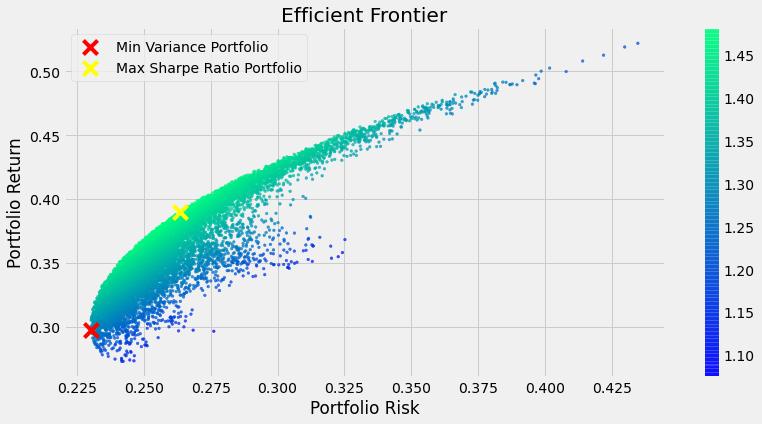

----------------------------------------------------------------------------------------------------
Return on Min Variance Potfolio 29.799999999999997%
Risk of Min Variance Potfolio 23.0%
Max Sharpe Ratio 1.482
Min Variance Weight [ 5.64448763 34.67724832 12.4083264  44.28717202  2.98276564]
Max Sharpe Ratio Weight [19.71468608 24.20822417 24.48513513  2.64325827 28.94869636]
----------------------------------------------------------------------------------------------------


In [2]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(12, 6))
plt.scatter(variance,returns,c=sharpe_ratio, cmap='winter',s=7,alpha=0.75)
plt.colorbar()
plt.scatter(min(variance),returns[variance.index(min(variance))],c='Red',marker='x',s=200,label='Min Variance Portfolio')
plt.scatter(variance[sharpe_ratio.index(max(sharpe_ratio))],returns[sharpe_ratio.index(max(sharpe_ratio))],c='Yellow',marker='x',s=200,label='Max Sharpe Ratio Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')
plt.legend()

plt.show()
print("-"*100)
print(f'Return on Min Variance Potfolio {returns[variance.index(min(variance))].round(3)*100}%')
print(f'Risk of Min Variance Potfolio {min(variance).round(3)*100}%')
print(f'Max Sharpe Ratio {max(sharpe_ratio).round(3)}')
print(f'Min Variance Weight {w[variance.index(min(variance))]*100}')
print(f'Max Sharpe Ratio Weight {w[sharpe_ratio.index(max(sharpe_ratio))]*100}')
print("-"*100)